In [93]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

score = []

In [94]:
class Player:
    def __init__(self):
        self.pos = 0
        self.double = 0
        self.imprisoned = False
        
        self.jailfree_chance = False
        self.jailfree_community = False
        
        self.tile_recorder = [0] * 40
        self.jail_recorder = [0] * 2
        
    def roll_dice(self):
        dice = [np.random.randint(1,6+1) for _ in range(2)] 
        if dice[0] == dice[1]: 
            self.double += 1
        else:
            self.reset_double()
        return sum(dice) 
    
    def update_pos(self, new_pos):
        self.pos = new_pos
        self.tile_recorder[new_pos] += 1
        if new_pos == 10:
                if self.imprisoned:
                    self.jail_recorder[1] += 1
                else:
                    self.jail_recorder[0] += 1
                    
    def reset_double(self):
        self.double = 0
    
    def update_jailfree(self, get_or_use, chance_or_community):
        if chance_or_community == 'Chance':
            if get_or_use == 'get':
                self.jailfree_chance = True
            else:
                self.jailfree_chance = False
        else:
            if get_or_use == 'get':
                self.jailfree_community = True
            else:
                self.jailfree_community = False
    
    def update_imprisoned(self, new_state):
        self.imprisoned = new_state
    
    def new_game(self):
        self.pos = 0
        self.double = 0 
        self.imprisoned = False 
        self.jailfree_chance = False
        self.jailfree_community = False

In [95]:
class Board:
    def __init__(self):
        self.name = ['Go', 'Brown 1', 'Community Chest 1', 'Brown 2', 'Income Tax',
                     'Station 1', 'Sky 1', 'Chance 1', 'Sky 2', 'Sky 3',
                     'Jail', 'Pink 1', 'Utility 1', 'Pink 2', 'Pink 3',
                     'Station 2', 'Orange 1', 'Community Chest 2', 'Orange 2', 'Orange 3',
                     'Free Parking', 'Red 1', 'Chance 2', 'Red 2', 'Red 3',
                     'Station 3', 'Yellow 1', 'Yellow 2', 'Utility 2', 'Yellow 3',
                     'Go To Jail', 'Green 1', 'Green 2', 'Community Chest 3', 'Green 3',
                     'Station 4', 'Chance 3', 'Blue 1', 'Luxury Tax', 'Blue 2']
        self.name_uk = ['Go', 'Old Kent Road', 'Community Chest', 'Whitechapel Road', 'Income Tax',
                        'King\'s Cross Station', 'The Angel Islington', 'Chance', 'Euston Road', 'Pentonville Road',
                        'Jail', 'Pall Mall', 'Electric Company', 'Whitehall', 'Northumberland Avenue',
                        'Marylebone Station', 'Bow Street', 'Community Chest', 'Marlborough Street', 'Vine Street',
                        'Free Parking', 'The Strand', 'Chance', 'Fleet Street', 'Trafalgar Square',
                        'Fenchurch St Station', 'Leicester Square', 'Coventry Street', 'Water Works', 'Piccadilly',
                        'Go To Jail', 'Regent Street', 'Oxford Street', 'Community Chest', 'Bond Street',
                        'Liverpool Street Station', 'Chance', 'Park Lane', 'Luxury Tax', 'Mayfair']

        self.name_us = ['Go', 'Mediterranean Avenue', 'Community Chest', 'Baltic Avenue', 'Income Tax',
                        'Reading Railroad', 'Oriental Avenue', 'Chance', 'Vermont Avenue', 'Connecticut Avenue',
                        'Jail', 'St. Charles Place', 'Electric Company', 'States Avenue', 'Virginia Avenue',
                        'Pennsylvania Railroad', 'St. James Place', 'Community Chest', 'Tennessee Avenue', 'New York Avenue',
                        'Free Parking', 'Kentucky Avenue', 'Chance', 'Indiana Avenue', 'Illinois Avenue',
                        'B. & O. Railroad', 'Atlantic Avenue', 'Ventnor Avenue', 'Water Works', 'Marvin Gardens',
                        'Go To Jail', 'Pacific Avenue', 'North Carolina Avenue', 'Community Chest', 'Pennsylvania Avenue',
                        'Short Line', 'Chance', 'Park Place', 'Luxury Tax', 'Boardwalk']
        
        self.land_type = ['no', 'land', 'no', 'land', 'no', 'station', 'land', 'no', 'land', 'land',
                          'no', 'land', 'utility', 'land', 'land', 'station', 'land', 'no', 'land', 'land',
                          'no', 'land', 'no', 'land', 'land', 'station', 'land', 'land', 'utility', 'land',
                          'no', 'land', 'land', 'no', 'land', 'station', 'no', 'land', 'no', 'land']
        self.land_price = [-1, 60, -1, 60, -1, 200, 100, -1, 100, 120,
                           -1, 140, 150, 140, 160, 200, 180, -1, 180, 200,
                           -1, 220, -1, 220, 240, 200, 260, 260, 150, 280, 
                           -1, 300, 300, -1, 320, 200, -1, 350, -1, 400]
        self.house_price = [-1, 50, -1, 50, -1, -1, 50, -1, 50, 50,
                            -1, 100, -1, 100, 100, -1, 100, -1, 100, 100,
                            -1, 150, -1, 150, 150, -1, 150, 150, -1, 150, 
                            -1, 200, 200, -1, 200, -1, -1, 200, -1, 200]
        self.rent = [-1, (2,10,30,90,160,250), -1, (4,20,60,180,320,450), -1,
                     (25,50,100,200), (6,30,90,270,400,550), -1, (6,30,90,270,400,550), (8,40,100,300,450,600),
                     -1, (10,50,150,450,625,750), (4*7,10*7), (10,50,150,450,625,750), (12,60,180,500,700,900),
                     (25,50,100,200), (14,70,200,550,750,950), -1, (14,70,200,550,750,950), (16,80,220,600,800,1000),
                     -1, (18,90,250,700,875,1050), -1, (18,90,250,700,875,1050), (20,100,300,750,925,1100),
                     (25,50,100,200), (22,110,330,800,975,1150), (22,110,330,800,975,1150), (4*7,10*7), (24,120,360,850,1025,1200),
                     -1, (26,130,390,900,1100,1275), (26,130,390,900,1100,1275), -1, (28,150,450,1000,1200,1400),
                     (25,50,100,200), -1, (35,175,500,1100,1300,1500), -1, (50,200,600,1400,1700,2000)]
        
        self.chance_deck = ['Advance to Go', 'Advance to Red 3', 'Advance to Pink 1', 
                            'Advance to nearest utility', 'Advance to nearest station', 
                            'Bank pays you', 'Get out of Jail Free', 'Go back 3 spaces', 
                            'Go to Jail', 'Make general repairs', 'Pay fine', 
                            'Advance to Station 1', 'Advance to Blue 2', 
                            'Elected chairman', 'Loan matures', 'Won crossword']
        self.community_deck = ['Advance to Go', 'Bank error', 'Doctors fees', 
                               'Sale of stock', 'Get out of Jail Free', 'Go to Jail', 
                               'Fund matures', 'Tax refund', 'Birthday', 'Insurance matures', 
                               'Hospital fees', 'School fees', 'Receive consultancy fee', 
                               'Street repairs', 'Beauty contest', 'Inherit']
        np.random.shuffle(self.chance_deck)
        np.random.shuffle(self.community_deck)

    def bound(self, pos): 
        return pos % 40
        
    def turn(self, player): 
        roll_again = True

        while roll_again:
            roll_again = False
            
            if player.imprisoned:
                if player.jailfree_chance:
                    player.update_jailfree('use', 'Chance')
                    self.chance_deck.append('Get out of Jail Free')
                elif player.jailfree_community:
                    player.update_jailfree('use', 'Community')
                    self.community_deck.append('Get out of Jail Free')
                player.update_imprisoned(False) 
            dice = player.roll_dice() 
            
            if player.double == 3: 
                player.reset_double()
                player.update_imprisoned(True)
                new_pos = 10
            else:
                interim_pos = self.bound(player.pos + dice) 
                if interim_pos in [7,22,36]: 
                    new_pos = self.chance(player, interim_pos)
                elif interim_pos in [2,17,33]: 
                    new_pos = self.community(player, interim_pos)
                elif interim_pos == 30: 
                    player.update_imprisoned(True)
                    new_pos = 10
                else: 
                    new_pos = interim_pos
                    
            player.update_pos(new_pos)
            
            if player.double > 0 and not player.imprisoned:
                roll_again = True
        
    def chance(self, player, interim_pos):
        pick = self.chance_deck.pop(0)
        
        if pick == 'Get out of Jail Free':
            player.update_jailfree('get', 'Chance')
        else:
            self.chance_deck.append(pick)
            
        if pick == 'Advance to Go':
            return 0
        elif pick == 'Advance to Red 3':
            return 24
        elif pick == 'Advance to Pink 1':
            return 11
        elif pick == 'Advance to nearest utility':
            if interim_pos > 12 and interim_pos <= 28:
                return 28
            else:
                return 12
        elif pick == 'Advance to nearest station':
            if interim_pos > 5 and interim_pos <= 15:
                return 15
            elif interim_pos > 15 and interim_pos <= 25:
                return 25
            elif interim_pos > 25 and interim_pos <= 35:
                return 35
            else:
                return 5
        elif pick == 'Go back 3 spaces':
            return self.bound(interim_pos - 3)
        elif pick == 'Go to Jail':
            player.update_imprisoned(True)
            return 10
        elif pick == 'Advance to Station 1':
            return 5
        elif pick == 'Advance to Blue 2':
            return 39
        else:
            return interim_pos

    def community(self, player, interim_pos):
        pick = self.community_deck.pop(0)
        
        if pick == 'Get out of Jail Free':
            player.update_jailfree('get', 'Community')
        else:
            self.community_deck.append(pick)
            
        if pick == 'Advance to Go':
            return 0
        elif pick == 'Go to Jail':
            player.update_imprisoned(True)
            return 10
        else:
            return interim_pos

In [96]:
def get_colour(name):
    if 'Brown' in name:
        return '#8b4513'
    elif 'Sky' in name:
        return '#87ceeb'
    elif 'Pink' in name:
        return '#ca2c92'
    elif 'Orange' in name:
        return '#ffa500'
    elif 'Red' in name:
        return '#ff0000'
    elif 'Yellow' in name:
        return '#ffff00'
    elif 'Green' in name:
        return '#00ff00'
    elif 'Blue' in name:
        return '#0000ff'
    elif 'Station' in name:
        return '#d7baaa'
    elif 'Utility' in name:
        return '#bfdbae'
    elif 'Jail' in name:
        return '#696969'
    elif 'Chance' in name or 'Community Chest' in name:
        return '#ffc3c3'
    else:
        return '#f7ffb2'

In [97]:
board = Board()

def get_cost(board, colour, n_house):
    each_house = [ hp for n, hp in zip(board.name, board.house_price) if colour in n ]
    each_land = [ lp for n, lp in zip(board.name, board.land_price) if colour in n ]
    return np.array(each_house) * n_house + np.array(each_land)

def get_rent(board, colour, n_house, whole_set=True):
    if n_house > 0:
        assert whole_set == True, 'Incompatible arguments'
    if n_house == 0 and whole_set:
        rent = [ r[n_house]*2 for n, r in zip(board.name, board.rent) if colour in n ]
    else:
        rent = [ r[n_house] for n, r in zip(board.name, board.rent) if colour in n ]
    return np.array(rent)

In [98]:
def get_n_round_stat(n_oppo):
    n_round_mean, n_round_std = 30, 3
    return n_round_mean, n_round_std

In [134]:
initial_state = np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]) #player starts at Go

transition_matrix = np.array(
                            [[0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #GO
                             [0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #Brown1
                             [1/16, 0, 0, 0, 1/36*14/16, 1/18*14/16, 1/12*14/16, 1/9*14/16, 5/36*14/16, 1/6*14/16, 5/36*14/16+1/16, 1/9*14/16, 1/12*14/16, 1/18*14/16, 1/36*14/16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #Community Chest
                             [0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #Brown2
                             [0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #IncomeTax
                             [0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #Rail1
                             [0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #lightblue1
                             [1/16, 0, 0, 0, 1/16, 1/16, 0, 0, 0, 1/36*7/16, 1/18*7/16, 1/12*7/16+1/16, 1/9*7/16+1/16, 5/36*7/16+1/16, 1/6*7/16, 5/36*7/16, 1/9*7/16+1/16, 1/12*7/16, 1/18*7/16, 1/36*7/16, 0, 0, 0, 0, 1/16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/16], #chance (8)
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #lightblue2
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #lightblue3
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #jail
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #pink1
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #utility1
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #pink2
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #pink3
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #rail2
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #orange1
                             [1/16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/16, 0, 0, 0, 0, 0, 0, 0, 0, 1/36*14/16, 1/18*14/16, 1/12*14/16, 1/9*14/16, 5/36*14/16, 1/6*14/16, 5/36*14/16, 1/9*14/16, 1/12*14/16, 1/18*14/16, 1/36*14/16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #community chest
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0], #orange2
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0], #orange 3
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0], #free parking
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0], # red 1
                             [1/16, 0, 0, 0, 0, 1/16, 0, 0, 0, 0, 1/16, 0, 0, 0, 0, 0, 0, 0, 0, 1/16, 0, 0, 0, 0, 1/36*7/16, 1/18*7/16+1/16, 1/12*7/16+1/16, 1/9*7/16, 5/36*7/16+1/16, 1/6*7/16+1/16, 5/36*7/16, 1/9*7/16, 1/12*7/16, 1/18*7/16, 1/36*7/16, 0, 0, 0, 0, 1/16], #chance (23)
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0], #red 2
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0], # red 3
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0], #rail 3
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0], #yellow 1
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36], #yellow2
                             [1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18],#utility 2
                             [1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12], #yellow 3
                             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #gotojail
                             [1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36], #green1
                             [5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6], #green2
                             [1/6*14/16+1/16, 5/36*14/16, 1/9*14/16, 1/12*14/16, 1/18*14/16, 1/36*14/16, 0, 0, 0, 0, 1/16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36*14/16, 1/18*14/16, 1/12*14/16, 1/9*14/16, 5/36*14/16], #community chest
                             [5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12, 1/9], #green3
                             [1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36, 1/18, 1/12], #rail4 
                             [1/12*7/16+1/16, 1/9*7/16, 5/36*7/16, 1/6*7/16, 5/36*7/16, 1/9*7/16+1/16+1/16, 1/12*7/16, 1/18*7/16, 1/36*7/16, 0, 1/16, 1/16, 1/16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/16, 0, 0, 0, 0, 0, 0, 0, 0, 1/16, 0, 0, 0, 0, 1/36*7/16, 1/18*7/16+1/16], #chance (37)
                             [1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/36], #darkblue1
                             [1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], #luxury tax
                             [0, 1/36, 1/18, 1/12, 1/9, 5/36, 1/6, 5/36, 1/9, 1/12, 1/18, 1/36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) #dark blue 2
print(transition_matrix)

for i in range(len(transition_matrix)):
  print("", end="[ ")
  for j in range(len(transition_matrix[i])):
    print(round(transition_matrix[i][j],1), end=", ")
  print("", end="]")
  print()

state_n_transitions = np.zeros((40,50))
state_n_transitions[:,0] = initial_state
tentoforty = np.zeros((1,40))

for i in range (1,50):
    state_n_transitions[:,i] = state_n_transitions[:,i-1].dot(transition_matrix)

for i in range (0,40):
   tentoforty[0,i] = sum(state_n_transitions[i,9:40])

graph = []

for i in range (0, 40):
   graph.append(tentoforty[0,i])

[[0.         0.         0.02777778 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.0625     0.         0.         ... 0.         0.         0.        ]
 ...
 [0.05555556 0.08333333 0.11111111 ... 0.         0.         0.02777778]
 [0.02777778 0.05555556 0.08333333 ... 0.         0.         0.        ]
 [0.         0.02777778 0.05555556 ... 0.         0.         0.        ]]
[ 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ]
[ 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ]
[ 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

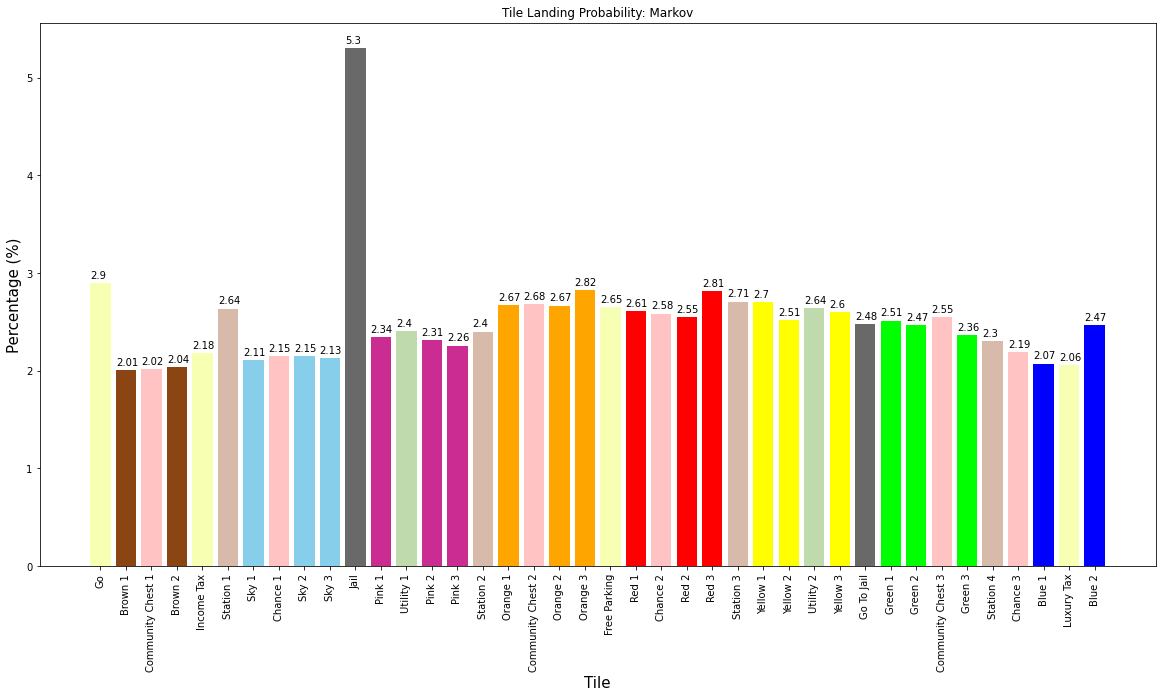

In [100]:
board = Board()
tile_name, tile_name_uk, tile_name_us = board.name, board.name_uk, board.name_us

tile_prob = [ x/sum(graph)*100 for x in graph ]
tile_colour = [get_colour(name) for name in tile_name]

plt.figure(figsize=(20,10))
bottom = plt.bar(tile_name, tile_prob, color=tile_colour)

plt.title("Tile Landing Probability: Markov")
plt.xticks(rotation='vertical')
plt.xlabel('Tile', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
for i in bottom:
  yval = i.get_height()
  plt.text(i.get_x(), yval + .05, round(yval,2))
plt.show()

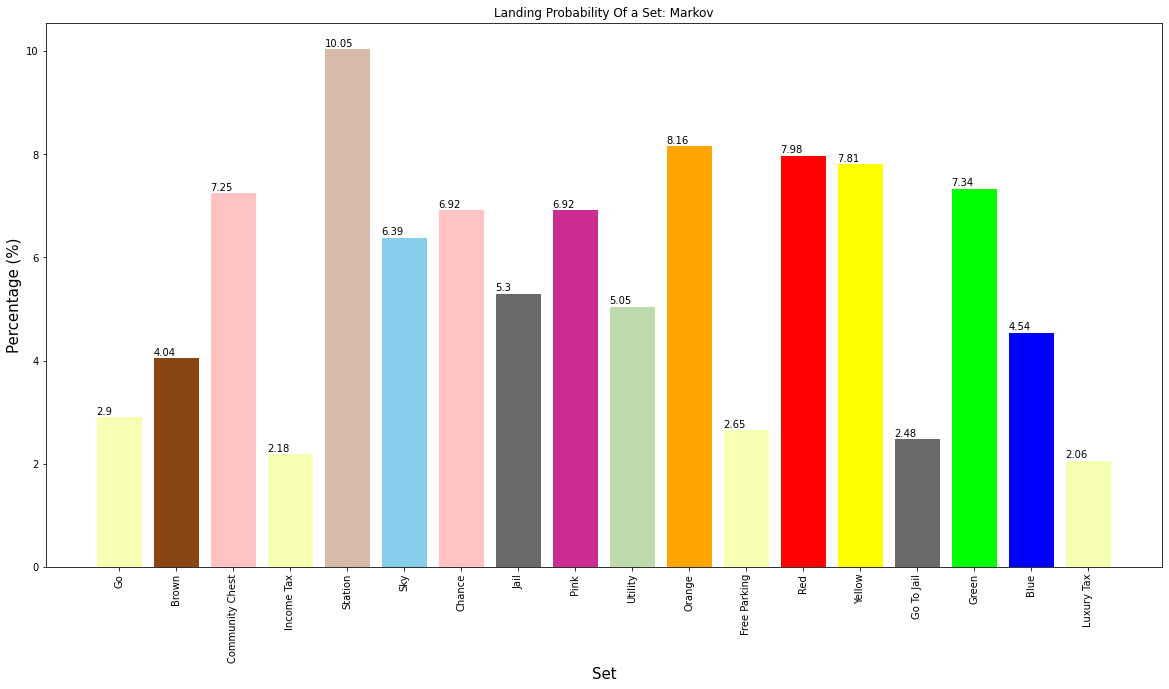

In [101]:
plt.figure(figsize=(20,10))
title_name = []
for title in tile_name:
  if title[len(title)-1].isdigit():
    title = title[0:len(title)-2]
  if title not in title_name:
    title_name.append(title)

plt.title("Landing Probability Of a Set: Markov")
tile_colour = [get_colour(name) for name in title_name]
set_prob = np.array(tile_prob)
bar = [0]*len(title_name)

for title, prob in zip(tile_name, set_prob):
  for name in title_name:
    if title[0:len(title)-2] in name:
      if(len(title)-2==0):
        bar[title_name.index("Go")] = bar[title_name.index("Go")] + prob
        break
      else:
        bar[title_name.index(name)] = bar[title_name.index(name)] + prob
        break

bottom = plt.bar(title_name, bar, color = tile_colour)
plt.xticks(rotation='vertical')
plt.xlabel('Set', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
for i in bottom:
  yval = i.get_height()
  plt.text(i.get_x(), yval + .05, round(yval,2))

plt.show()

In [102]:
df1 = pd.DataFrame(zip(title_name, bar),columns=['name', '%'] )

In [103]:
df1.sort_values(by=['%'], ascending=False).head(7)

,name,%
4,Station,10.046337
10,Orange,8.160558
12,Red,7.978127
13,Yellow,7.814742
15,Green,7.338399
2,Community Chest,7.251967
6,Chance,6.921154


In [104]:
opponents = []
n_oppo = 4-1

n_game = 1e5
n_round_mean, n_round_std = get_n_round_stat(n_oppo)

for _ in range(n_oppo):
    opponents.append(Player())

for i in range(round(n_game)): 
    board = Board()
    if (i+1)%10000 == 0:
        print("Epoch: {}/{}  ".format(i+1, int(n_game)))
    for player in opponents:
        player.new_game()
        
    n_round = np.random.normal(n_round_mean, n_round_std)
    for j in range(round(n_round)): 
        for player in opponents:
            board.turn(player=player)

Epoch: 10000/100000  
Epoch: 20000/100000  
Epoch: 30000/100000  
Epoch: 40000/100000  
Epoch: 50000/100000  
Epoch: 60000/100000  
Epoch: 70000/100000  
Epoch: 80000/100000  
Epoch: 90000/100000  
Epoch: 100000/100000  


In [105]:
board = Board()
tile_name, tile_name_uk, tile_name_us = board.name, board.name_uk, board.name_us

tile_cnt = list(map(sum, zip(*[x.tile_recorder for x in opponents])))
jail_cnt = list(map(sum, zip(*[x.jail_recorder for x in opponents])))

tile_prob = [ x/sum(tile_cnt)*100 for x in tile_cnt ]
tile_prob[10] = jail_cnt[1]/sum(tile_cnt)*100
tile_colour = [get_colour(name) for name in tile_name]

just_visiting = [0] * 40
just_visiting[10] = jail_cnt[0]/sum(tile_cnt)*100
just_visiting_colour = ['#5356f4'] * 40

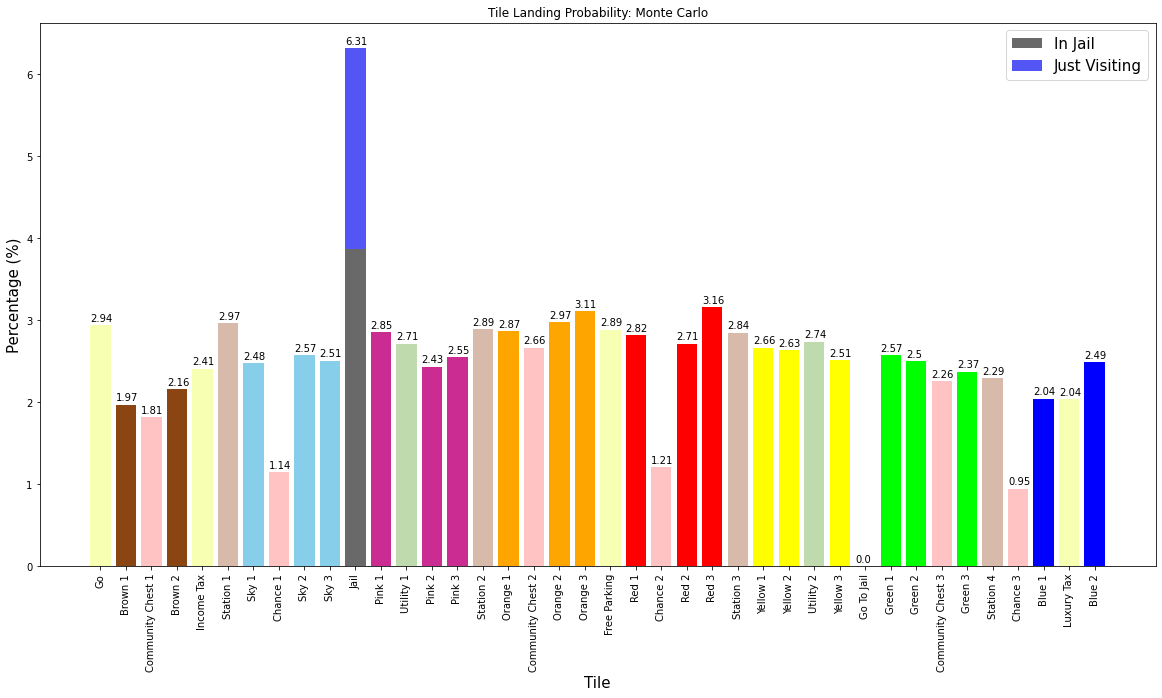

In [106]:
plt.figure(figsize=(20,10))
bottom = plt.bar(tile_name, tile_prob, color=tile_colour)
top = plt.bar(tile_name, just_visiting, bottom=tile_prob, color=just_visiting_colour)

plt.title("Tile Landing Probability: Monte Carlo")
plt.xticks(rotation='vertical')
plt.xlabel('Tile', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.legend((bottom[10], top[10]), ('In Jail', 'Just Visiting'), prop={'size':15})
for i,j in zip(bottom, top):
  yval = i.get_height() +j.get_height()
  plt.text(i.get_x(), yval + .05, round(yval,2))
plt.show()

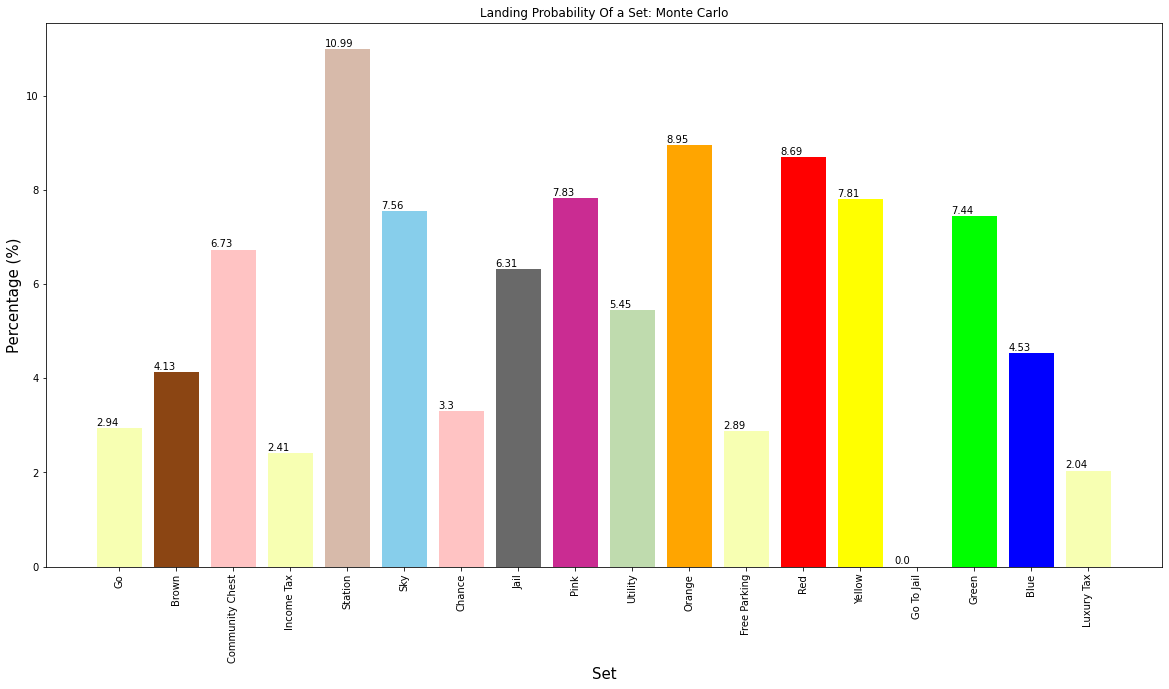

In [107]:
plt.figure(figsize=(20,10))
title_name = []
for title in tile_name:
  if title[len(title)-1].isdigit():
    title = title[0:len(title)-2]
  if title not in title_name:
    title_name.append(title)

plt.title("Landing Probability Of a Set: Monte Carlo")
tile_colour = [get_colour(name) for name in title_name]
set_prob = np.array(tile_prob)+np.array(just_visiting)
bar = [0]*len(title_name)

for title, prob in zip(tile_name, set_prob):
  for name in title_name:
    if title[0:len(title)-2] in name:
      if(len(title)-2==0):
        bar[title_name.index("Go")] = bar[title_name.index("Go")] + prob
        break
      else:
        bar[title_name.index(name)] = bar[title_name.index(name)] + prob
        break

bottom = plt.bar(title_name, bar, color = tile_colour)
score.append(bar)
for i in bottom:
  yval = i.get_height()
  plt.text(i.get_x(), yval + .05, round(yval,2))
plt.xticks(rotation='vertical')
plt.xlabel('Set', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)

plt.show()

In [108]:
df1 = pd.DataFrame(zip(title_name, bar),columns=['name', '%'] )

In [109]:
df2 = pd.DataFrame(zip(tile_name, tile_name_uk, tile_name_us, 
                      [ x/sum(tile_cnt)*100 for x in tile_cnt ]),columns=['name', 'name (UK)', 'name (US)', '%'] )

In [110]:
df2.sort_values(by=['%'], ascending=False).head(7)

,name,name (UK),name (US),%
10,Jail,Jail,Jail,6.313943
24,Red 3,Trafalgar Square,Illinois Avenue,3.158939
19,Orange 3,Vine Street,New York Avenue,3.107359
18,Orange 2,Marlborough Street,Tennessee Avenue,2.973499
5,Station 1,King's Cross Station,Reading Railroad,2.965845
0,Go,Go,Go,2.935474
15,Station 2,Marylebone Station,Pennsylvania Railroad,2.890133


In [111]:
df1.sort_values(by=['%'], ascending=False).head(7)

,name,%
4,Station,10.993595
10,Orange,8.948300
12,Red,8.691654
8,Pink,7.833935
13,Yellow,7.807901
5,Sky,7.557765
15,Green,7.441920


In [112]:
winconditions = [0]*40
killconditions = [0]*40
winconditions1000 = [0]*40
killconditions1000 = [0]*40
tolerance = []
tolerance1 = []

land_type = ['no', 'land', 'no', 'land', 'no', 'station', 'land', 'no', 'land', 'land',
                          'no', 'land', 'utility', 'land', 'land', 'station', 'land', 'no', 'land', 'land',
                          'no', 'land', 'no', 'land', 'land', 'station', 'land', 'land', 'utility', 'land',
                          'no', 'land', 'land', 'no', 'land', 'station', 'no', 'land', 'no', 'land']

rent = [-1, (2,10,30,90,160,250), -1, (4,20,60,180,320,450), -1,
                     (25,50,100,200), (6,30,90,270,400,550), -1, (6,30,90,270,400,550), (8,40,100,300,450,600),
                     -1, (10,50,150,450,625,750), (4,10), (10,50,150,450,625,750), (12,60,180,500,700,900),
                     (25,50,100,200), (14,70,200,550,750,950), -1, (14,70,200,550,750,950), (16,80,220,600,800,1000),
                     -1, (18,90,250,700,875,1050), -1, (18,90,250,700,875,1050), (20,100,300,750,925,1100),
                     (25,50,100,200), (22,110,330,800,975,1150), (22,110,330,800,975,1150), (4,10), (24,120,360,850,1025,1200),
                     -1, (26,130,390,900,1100,1275), (26,130,390,900,1100,1275), -1, (28,150,450,1000,1200,1400),
                     (25,50,100,200), -1, (35,175,500,1100,1300,1500), -1, (50,200,600,1400,1700,2000)]

n_game = 1e5
g = round(n_game)
total = 0

for n in range(round(n_game)):
  ownership = [-1]*40
  position = [np.random.randint(40), np.random.randint(40), np.random.randint(40), np.random.randint(40)]
  i = 0

  chance = ['Advance to Go', 'Advance to Red 3', 'Advance to Pink 1', 
                            'Advance to nearest utility', 'Advance to nearest station', 
                            'Bank pays you', 'Get out of Jail Free', 'Go back 3 spaces', 
                            'Go to Jail', 'Make general repairs', 'Pay fine', 
                            'Advance to Station 1', 'Advance to Blue 2', 
                            'Elected chairman', 'Loan matures', 'Won crossword']

  community = ['Advance to Go', 'Bank error', 'Doctors fees', 
                               'Sale of stock', 'Get out of Jail Free', 'Go to Jail', 
                               'Fund matures', 'Tax refund', 'Birthday', 'Insurance matures', 
                               'Hospital fees', 'School fees', 'Receive consultancy fee', 
                               'Street repairs', 'Beauty contest', 'Inherit']

  np.random.shuffle(chance)
  np.random.shuffle(community)
  while i < len(land_type):
    if land_type[i] == "utility" and ownership[i] == -1:
      ownership[i] = np.random.randint(4)
      ownership[12] = ownership[i]
      ownership[28] = ownership[i]
    if land_type[i] == "station" and ownership[i] == -1:
      ownership[i] = np.random.randint(4)
      ownership[5] = ownership[i]
      ownership[15] = ownership[i]
      ownership[25] = ownership[i]
      ownership[35] = ownership[i]
    if land_type[i] == "land" and ownership[i] == -1:
      ownership[i] = np.random.randint(4)
      if i == 1 or i == 37:
        ownership[i+2] = ownership[i]
      else:
        k = 0
        j = i + 1
        while j < len(land_type):
          if land_type[j] == "land":
            ownership[j] = ownership[i]
            k = k + 1
            if k==2:
              break
          j = j + 1
    i = i + 1
  
  if (n)%10000 == 0:
        print("Epoch: {}/{}  ".format(n, int(n_game)))

  bankrupt = False
  money = [np.random.randint(1000, 2000)]*4
  bankruptCount = 0
  rounds = 0
  imprisoned = [0]*4
  if len(tolerance)<501:
    tolerance.append(np.max(abs(np.array(winconditions1000) - np.array(winconditions))/np.sum(winconditions)*100))
    winconditions1000 = np.array(winconditions)

  if len(tolerance1)<2001 and np.max(abs(np.array(killconditions1000) - np.array(killconditions))/np.sum(killconditions)*100)!=0:
    tolerance1.append(np.max(abs(np.array(killconditions1000) - np.array(killconditions))/np.sum(killconditions)*100))
    killconditions1000 = np.array(killconditions)

  while not bankrupt:
    if bankruptCount == 3 or rounds > 40:
      win = money.index(max(money))
      bankrupt = True
      total = total + rounds
      for owner in ownership:
        if owner == win:
          winconditions[ownership.index(owner)] = winconditions[ownership.index(owner)] + 1
          ownership[ownership.index(owner)] = -1
      break
    for player in range(4):
      bankruptCount = 0
      if money[player]<=0:
        for player in range(4):
          if money[player]<=0:
            bankruptCount = bankruptCount + 1
      if bankruptCount == 3:
        break
      double  = True
      k = 0
      n_sum = position[player]
      while(double):
        doubleRent = False
        dice = [np.random.randint(1,6+1) for _ in range(2)]
        n_sum = n_sum + dice[0] + dice[1]
        if dice[0] == dice[1]:
          if imprisoned[player] > 0:
            imprisoned[player] = -1
            double = False
          else:
            double = True
          k=k+1
        else:
          double = False
          if imprisoned[player] > 0:
            imprisoned[player] = imprisoned[player] - 1
            continue
          if n_sum/40 == 1 :
            money[player] = money[player] + 200
          if money[player] < 50 and imprisoned[player] == 0:
            imprisoned[player] = -1
            money[player] = 0
            continue
          elif money[player] > 50 and imprisoned[player] == 0:
            impriosned = -1
            money[player] = money[player] - 50
            continue
          position[player] = n_sum%40

          if position[player] == 2 or position[player] == 17 or  position[player] == 33:
            pick = community.pop(0)

            if pick == 'Advance to Go':
              position[player] = 40
            elif pick == 'Go to Jail':
              imprisoned[player] = 3
              position[player] = 10
            elif pick == 'Bank error':
              money[player] = money[player] + 200
            elif pick == 'Doctors fees':
              money[player] = money[player] - 50
            elif pick == 'Sale of stock':
              money[player] = money[player] + 50
            elif pick == 'Fund matures':
              money[player] = money[player] + 100
            elif pick == 'Tax refund':
              money[player] = money[player] + 20
            elif pick == 'Birthday':
              money[player] = money[player] + 10
              for iter in range(4):
                  if money[iter] <= 10:
                    money[player] = money[player] + money[iter]
                    money[player] = 0
                  elif money[iter] > 0 :
                    money[player] = money[player] + 10
                    money[iter] = money[iter] - 10 
            elif pick == 'Insurance matures':
              money[player] = money[player] + 100
            elif pick == 'Hospital fees':
              money[player] = money[player] - 100
            elif pick == 'School fees':
              money[player] = money[player] - 50
            elif pick == 'Receive consultancy fee':
              money[player] = money[player] + 25
            elif pick == 'Street repairs':
              hotelCount = 0
              for iter in range(len(land_type)):
                if land_type[iter] == "land":
                  if ownership[iter] == player:
                    hotelCount = hotelCount + 1
              money[player] = money[player] - hotelCount*115
            elif pick == 'Beauty contest':
              money[player] = money[player] + 10
            elif pick == 'Inherit':
              money[player] = money[player] + 100

          if position[player] == 7 or position[player] == 22 or  position[player] == 36:
            pick = chance.pop(0)

            if pick == 'Advance to Go':
                position[player] = 40
            elif pick == 'Bank pays you':
                money[player] = money[player] + 50
            elif pick == 'Pay fine':
                money[player] = money[player] - 15
            elif pick == 'Loan matures':
                money[player] = money[player] + 150
            elif pick == 'Won crossword':
                money[player] = money[player] + 100
            elif pick == 'Make general repairs':
                hotelCount = 0
                for iter in range(len(land_type)):
                  if land_type[iter] == "land":
                    if ownership[iter] == player:
                      hotelCount = hotelCount + 1
                money[player] = money[player] - hotelCount*100
            elif pick == 'Elected chairman':
                for iter in range(4):
                  if money[iter] > 0 and money[player] < 50:
                    money[iter] = money[iter] + money[player]
                    money[player] = 0
                  elif money[iter] > 0 :
                    money[iter] = money[iter] + 50
                    money[player] = money[player] - 50 
            elif pick == 'Advance to Red 3':
                if position[player] > 24:
                  position[player] = 64
                else:
                  position[player] = 24
            elif pick == 'Advance to Pink 1':
                if position[player] > 11:
                  position[player] = 51
                else:
                  position[player] = 11
            elif pick == 'Advance to nearest utility':
                if position[player] > 12 and position[player] <= 28:
                    position[player] = 28
                else:
                  if position[player] > 28 and position[player] < 40:
                    position[player] = 52
                  else:
                    position[player] = 12
            elif pick == 'Advance to nearest station':
              doubleRent = True
              if position[player] > 5 and position[player] <= 15:
                  position[player] = 15
              elif position[player] > 15 and position[player] <= 25:
                  position[player] = 25
              elif position[player] > 25 and position[player] <= 35:
                  position[player] = 35
              else:
                if position[player] > 35 and position[player] < 40:
                   position[player] = 45
                else:
                  position[player] = 5
            elif pick == 'Go back 3 spaces':
                position[player] = position[player] - 3
            elif pick == 'Go to Jail':
                imprisoned[player] = 3
                position[player] = 10
            elif pick == 'Advance to Station 1':
                if position[player] > 35 and position[player] < 40:
                    position[player] = 45
                else:
                    position[player] = 5
            elif pick == 'Advance to Blue 2':
                position[player] = 39

          if position[player]/40 == 1 :
            money[player] = money[player] + 200
          if money[player] < 50 and imprisoned[player] == 0:
            imprisoned[player] = -1
            money[player] = 0
            continue
          elif money[player] > 50 and imprisoned[player] == 0:
            imprisoned[player] = -1
            money[player] = money[player] - 50
          position[player] = position[player]%40

          if position[player] == 4:
            money[player] = money[player] - 200
          elif position[player] == 38:
            money[player] = money[player] - 100
          elif position[player] == 30:
            position[player] = 10
            imprisoned[player] = 3
          elif ownership[position[player]]!=player and ownership[position[player]]!= -1 and money[ownership[position[player]]]>0:
            if land_type[position[player]]=="utility":
              rental = 1
              if money[player] - (dice[0]+dice[1])*rent[position[player]][rental] <= 0:
                money[ownership[position[player]]] = money[ownership[position[player]]] + money[player]
                money[player] = 0
              else:
                money[player] = money[player] - (dice[0]+dice[1])*rent[position[player]][rental]
                money[ownership[position[player]]] = money[ownership[position[player]]] + (dice[0]+dice[1])*rent[position[player]][rental]
              continue

            elif land_type[position[player]]=="land":
              rental = 5
            elif land_type[position[player]]=="station":
              rental = 3
            if doubleRent == False:
              if money[player] - rent[position[player]][rental] <= 0:
                money[ownership[position[player]]] = money[ownership[position[player]]] + money[player]
                money[player] = 0
              else:
                money[player] = money[player] - rent[position[player]][rental]
                money[ownership[position[player]]] = money[ownership[position[player]]] + rent[position[player]][rental]
            else:
              if money[player] - 2*rent[position[player]][rental] <= 0:
                money[ownership[position[player]]] = money[ownership[position[player]]] + money[player]
                money[player] = 0
              else:
                money[player] = money[player] - 2*rent[position[player]][rental]
                money[ownership[position[player]]] = money[ownership[position[player]]] + 2*rent[position[player]][rental]
        if money[player] <= 0:
          killconditions[position[player]] = killconditions[position[player]] + 1
        if k==3:
          double = False
          imprisoned[player] = 3
          position[player] = 10
      rounds = rounds + 1
print(killconditions)
print(winconditions)

Epoch: 0/100000  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide


Epoch: 10000/100000  
Epoch: 20000/100000  
Epoch: 30000/100000  
Epoch: 40000/100000  
Epoch: 50000/100000  
Epoch: 60000/100000  
Epoch: 70000/100000  
Epoch: 80000/100000  
Epoch: 90000/100000  
[1, 100, 27, 115, 114, 104, 146, 19, 89, 123, 188, 154, 15, 117, 127, 87, 202, 27, 204, 278, 59, 316, 20, 303, 380, 121, 386, 352, 25, 339, 0, 302, 340, 43, 318, 99, 33, 280, 102, 310]
[0, 25124, 0, 25124, 0, 25260, 24891, 0, 24891, 24891, 0, 25543, 25245, 25543, 25543, 25260, 26255, 0, 26255, 26255, 0, 25673, 0, 25673, 25673, 25260, 25557, 25557, 25245, 25557, 0, 25215, 25215, 0, 25215, 25260, 0, 24940, 0, 24940]


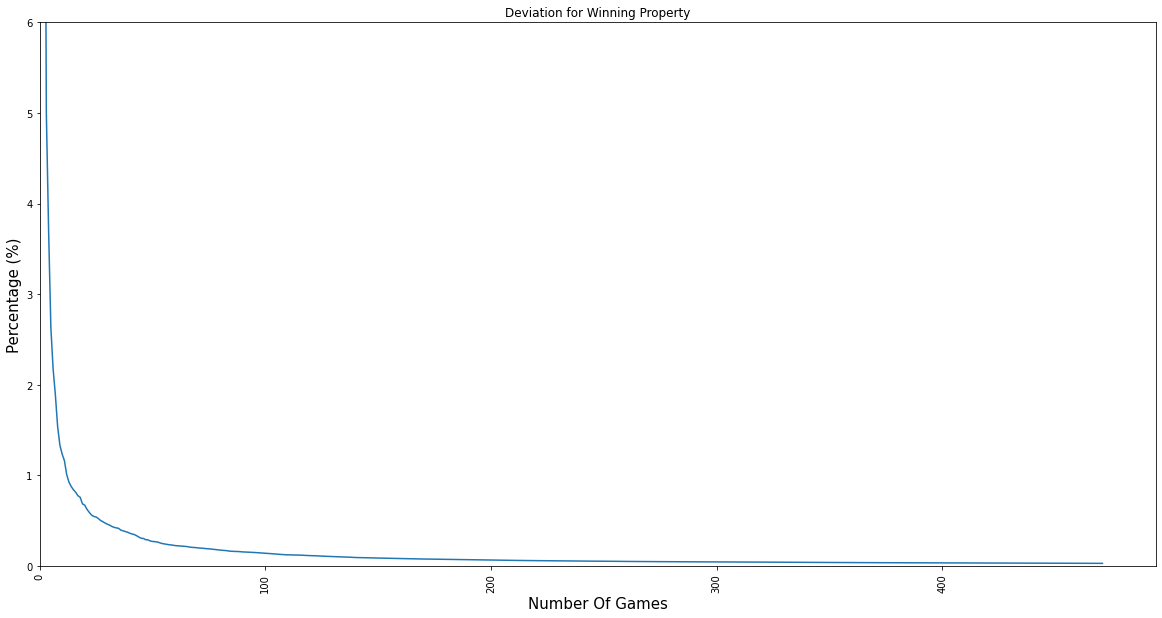

In [113]:
plt.figure(figsize=(20,10))
tolerance = [i for i in tolerance if i != 0]
tolerance[0]=100
bottom = plt.plot(list(range(0, len(tolerance))), np.array(tolerance))
plt.xticks(rotation='vertical')
plt.xlabel('Number Of Games', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15) 
plt.title("Deviation for Winning Property")
plt.ylim(0,6)
plt.xlim(0)
plt.show()

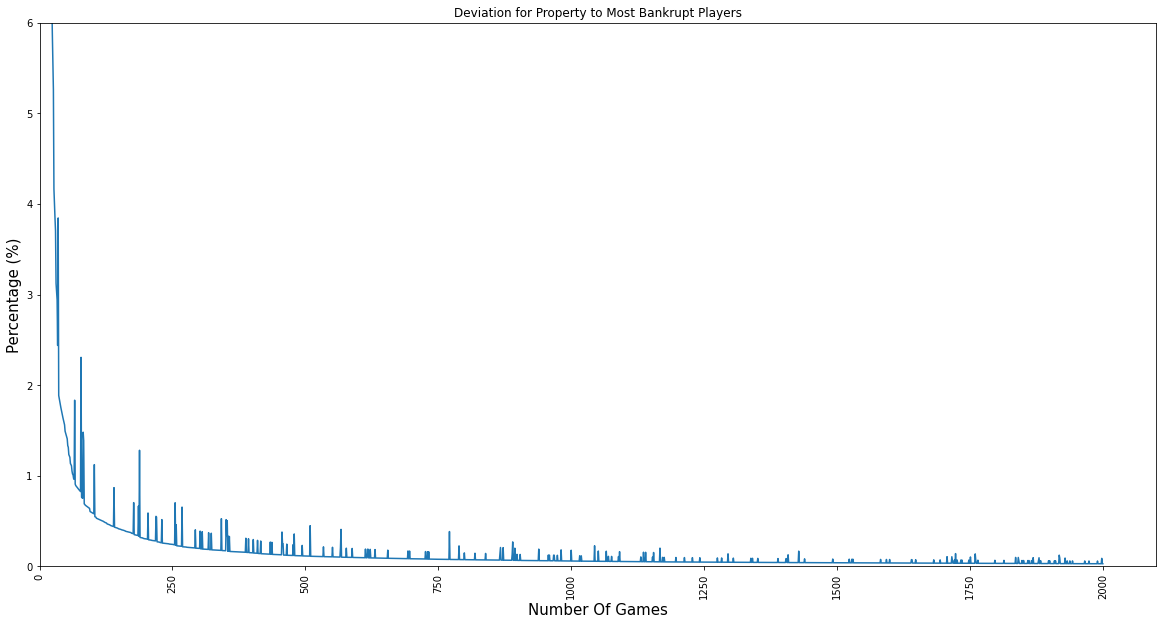

In [114]:
plt.figure(figsize=(20,10))
tolerance1 = [i for i in tolerance1 if i != 0]
bottom = plt.plot(list(range(0, len(tolerance1))), np.array(tolerance1))
plt.xticks(rotation='vertical')
plt.xlabel('Number Of Games', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title("Deviation for Property to Most Bankrupt Players")
plt.ylim(0,6)
plt.xlim(0)
plt.show()

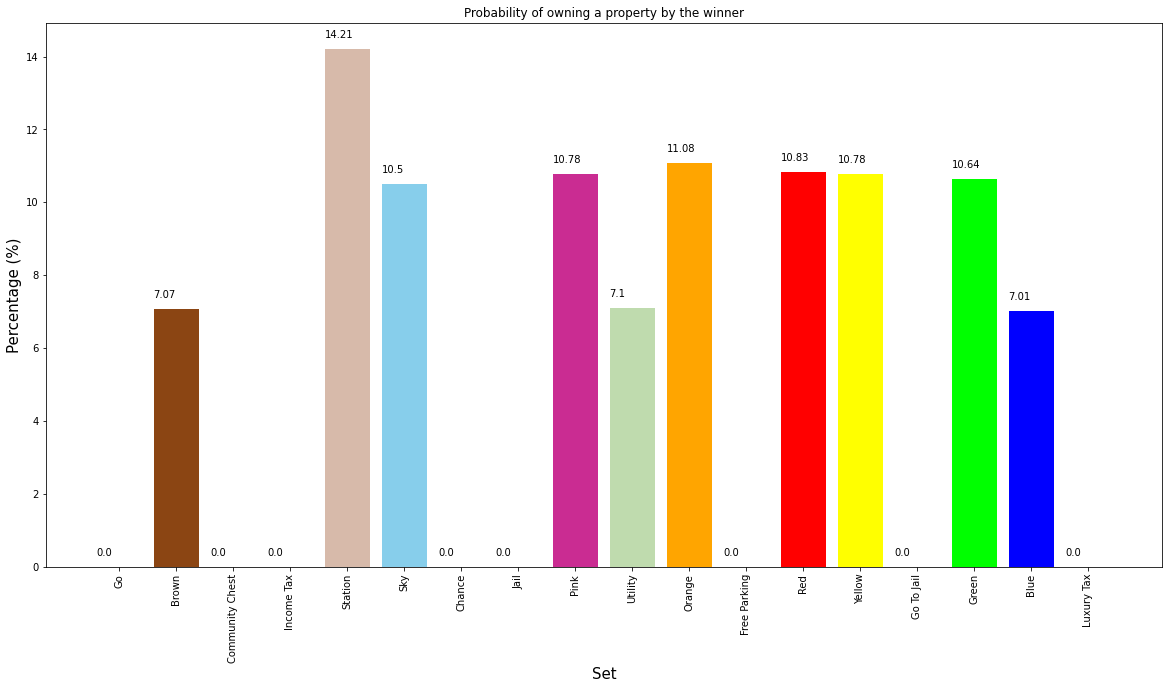

In [115]:
plt.figure(figsize=(20,10))
title_name = []
for title in tile_name:
  if title[len(title)-1].isdigit():
    title = title[0:len(title)-2]
  if title not in title_name:
    title_name.append(title)

tile_colour = [get_colour(name) for name in title_name]
set_prob = np.array(winconditions)/np.sum(winconditions)*100
bar = [0]*len(title_name)

for title, prob in zip(tile_name, set_prob):
  for name in title_name:
    if title[0:len(title)-2] in name:
      if(len(title)-2==0):
        bar[title_name.index("Go")] = bar[title_name.index("Go")] + prob
        break
      else:
        bar[title_name.index(name)] = bar[title_name.index(name)] + prob
        break
bottom = plt.bar(title_name, bar, color = tile_colour)
score.append(bar)
plt.xticks(rotation='vertical')
plt.title("Probability of owning a property by the winner")
plt.xlabel('Set', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)

for i in bottom:
  yval = i.get_height()
  plt.text(i.get_x(), yval + .30, round(yval,2))

plt.show()

In [116]:
df3 = pd.DataFrame(zip(title_name, bar),columns=['Name', '%'] )

In [117]:
df3.sort_values(by=['%'], ascending=False).head(10)

,Name,%
4,Station,14.209771
10,Orange,11.077124
12,Red,10.831575
13,Yellow,10.782634
8,Pink,10.776728
15,Green,10.638343
5,Sky,10.501645
9,Utility,7.100667
1,Brown,7.066633
16,Blue,7.014879


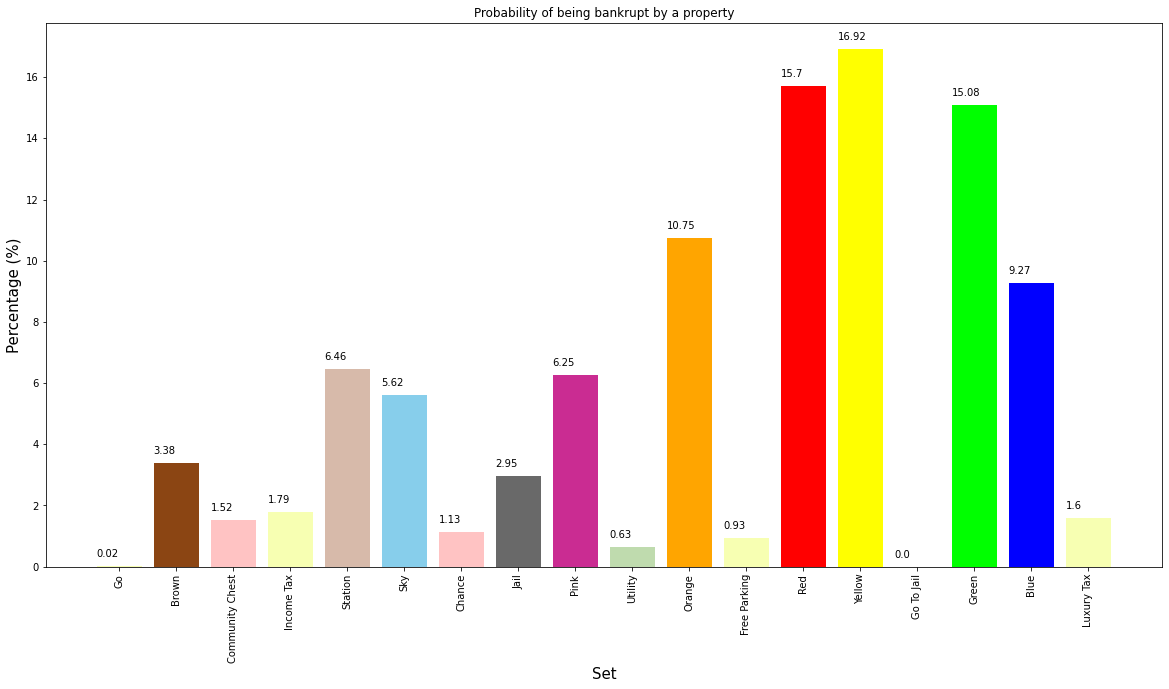

In [118]:
plt.figure(figsize=(20,10))
title_name = []
for title in tile_name:
  if title[len(title)-1].isdigit():
    title = title[0:len(title)-2]
  if title not in title_name:
    title_name.append(title)

tile_colour = [get_colour(name) for name in title_name]
set_prob = np.array(killconditions)/np.sum(killconditions)*100
bar = [0]*len(title_name)

for title, prob in zip(tile_name, set_prob):
  for name in title_name:
    if title[0:len(title)-2] in name:
      if(len(title)-2==0):
        bar[title_name.index("Go")] = bar[title_name.index("Go")] + prob
        break
      else:
        bar[title_name.index(name)] = bar[title_name.index(name)] + prob
        break
bottom = plt.bar(title_name, bar, color = tile_colour)
score.append(bar)
plt.xticks(rotation='vertical')
plt.title("Probability of being bankrupt by a property")
plt.xlabel('Set', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)

for i in bottom:
  yval = i.get_height()
  plt.text(i.get_x(), yval + .30, round(yval,2))

plt.show()

In [119]:
df4 = pd.DataFrame(zip(title_name, bar),columns=['Name', '%'] )

In [120]:
df4.sort_values(by=['%'], ascending=False).head(10)

,Name,%
13,Yellow,16.920660
12,Red,15.695208
15,Green,15.082482
10,Orange,10.746269
16,Blue,9.269442
4,Station,6.457188
8,Pink,6.252946
5,Sky,5.624509
1,Brown,3.377848
7,Jail,2.953653


In [121]:
title_name = []
tile_colour1 = tile_colour.copy()
for title in tile_name:
  if title[len(title)-1].isdigit():
    title = title[0:len(title)-2]
  if title not in title_name:
    title_name.append(title)
x= score.copy()
x.append([0,620,0,0,800,1070,0,0,1940,300,2060,0,2930,3050,0,3920,2750,0])
print(x)
for i in reversed(range(len(score[0]))):
  print(i)
  if x[3][i] == 0:
    for j in x:
      del j[i]
    title_name.pop(i)
    tile_colour1.pop(i)

print(x)

score1 = []
score_sum = [[0]*len(x[0])]*len(x)
for i in range(len(x)-1):
  score1.append(x[i]/np.max(x[i])*10)
score1.append(10-(x[3]*10/(np.max(x[3])-np.min(x[3]))))
score_sum = [0]*len(x[0])
for i in range(len(score1[0])):
  for j in range(len(score1)):
    score_sum[i] = score_sum[i]+score1[j][i]
print(score_sum)

[[2.935473816950654, 4.131303504947306, 6.734390066435296, 2.40625477477042, 10.993595355403112, 7.557765412595904, 3.2995906074955332, 6.3139432804816895, 7.833935089071746, 5.451006721846268, 8.94830034332912, 2.8852517804653424, 8.691653652123822, 7.807901319365968, 0.0, 7.441920289824525, 4.5290234376061225, 2.0386905472871715], [0.0, 7.066632914240712, 0.0, 0.0, 14.209771327314149, 10.501645430765338, 0.0, 0.0, 10.776727702303603, 7.100666610412623, 11.077124293308582, 0.0, 10.831575394481478, 10.782634376845834, 0.0, 10.63834275588558, 7.0148791944421, 0.0], [0.015710919088766692, 3.377847604084839, 1.5239591516103692, 1.791044776119403, 6.457187745483111, 5.624509033778476, 1.131186174391202, 2.9536527886881383, 6.252945797329144, 0.6284367635506677, 10.746268656716419, 0.9269442262372349, 15.695208169677926, 16.920659858601727, 0.0, 15.082482325216025, 9.269442262372348, 1.6025137470542028], [0, 620, 0, 0, 800, 1070, 0, 0, 1940, 300, 2060, 0, 2930, 3050, 0, 3920, 2750, 0]]
17
1

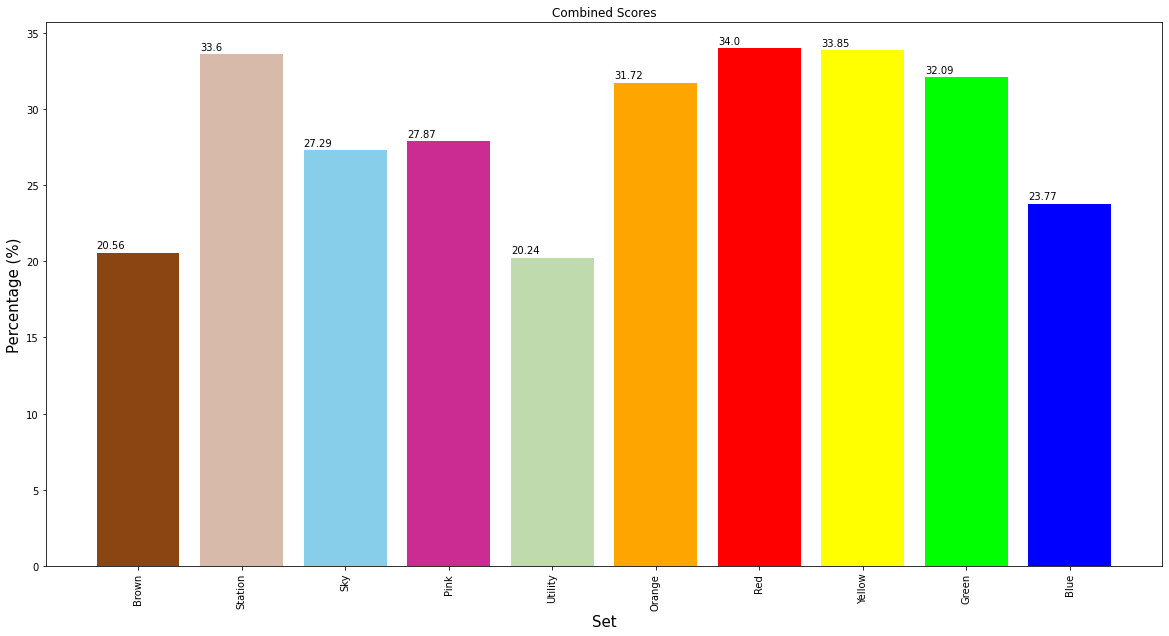

In [122]:
plt.figure(figsize=(20,10))
bottom = plt.bar(title_name, score_sum, color = tile_colour1)
plt.xticks(rotation='vertical')
plt.xlabel('Set', fontsize=15)
plt.ylabel('Percentage (%)', fontsize=15)
plt.title("Combined Scores")
for i in bottom:
  yval = i.get_height()
  plt.text(i.get_x(), yval + .30, round(yval,2))

plt.show()